In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import pandas as pd

In [3]:
directory = '../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [4]:
# Lendo a base de dados.
data = pd.read_csv(directory)
data.shape

(7043, 21)

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# A variável TotalCharges deveria ser um float, porém tem algumas linhas com caracteres bizarros.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# As 11 linhas vazias em TotalCharges são resultado dos caracteres bizarros. Como são só 11 linhas, vamos deletá-las.
data.dropna(inplace = True)

In [8]:
# Tipos das variáveis.
tipos_das_variaveis = data.dtypes
tipos_das_variaveis

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
# Substituindo as strings das variáveis categóricas por números.
data['gender'] = data['gender'].map(lambda x: 1 if x == 'Male' else 0)
data['Partner'] = data['Partner'].map(lambda x: 1 if x == 'Yes' else 0)
data['Dependents'] = data['Dependents'].map(lambda x: 1 if x == 'Yes' else 0)
data['PhoneService'] = data['PhoneService'].map(lambda x: 1 if x == 'Yes' else 0)
data['MultipleLines'] = data['MultipleLines'].map(lambda x: 1 if x  == 'Yes' else (0 if x == 'No' else 2))
data['InternetService'] = data['InternetService'].map(lambda x: 1 if x  == 'Fiber optic' else (0 if x == 'No' else 2))
data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda x: 1 if x  == 'Yes' else (0 if x == 'No' else 2))
data['OnlineBackup'] = data['OnlineBackup'].map(lambda x: 1 if x  == 'Yes' else (0 if x == 'No' else 2))
data['DeviceProtection'] = data['DeviceProtection'].map(lambda x: 1 if x  == 'Yes' else (0 if x == 'No' else 2))
data['TechSupport'] = data['TechSupport'].map(lambda x: 1 if x  == 'Yes' else (0 if x == 'No' else 2))
data['StreamingTV'] = data['StreamingTV'].map(lambda x: 1 if x  == 'Yes' else (0 if x == 'No' else 2))
data['StreamingMovies'] = data['StreamingMovies'].map(lambda x: 1 if x  == 'Yes' else (0 if x == 'No' else 2))
data['Contract'] = data['Contract'].map(lambda x: 1 if x  == 'Month-to-month' else (0 if x == 'One year' else 2))
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda x: 1 if x == 'Yes' else 0)
data['PaymentMethod'] = data['PaymentMethod'].map(lambda x: 0 if x == 'Electronic check' else(1 if x == 'Mailed check' else(2 if x == 'Bank transfer (automatic)' else 3)))

In [10]:
# Verificando balanceamento da variável resposta.
data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [11]:
# Divisão em treino/teste
from sklearn.model_selection import train_test_split

data['Churn'] = data['Churn'].map(lambda x: 1 if x == 'Yes' else 0)
y = data['Churn']
data = data.drop(['customerID', 'Churn'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 19), (1407, 19), (5625,), (1407,))

In [12]:
# Normalizando variáveis numéricas.
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [13]:
# Treinando uma Random Forest para classificação através de GridSearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier(random_state=11)

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
              min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                     n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 26.1min finished


In [14]:
final_table = pd.DataFrame(bestF.cv_results_)
final_table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.553110,0.005202,0.041686,0.000738,5,1,2,100,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.803200,0.795733,0.807467,0.802133,0.004849,366
1,1.694269,0.025398,0.124365,0.007570,5,1,2,300,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.802133,0.797333,0.806933,0.802133,0.003919,366
2,2.760974,0.041501,0.191867,0.001433,5,1,2,500,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.801067,0.797867,0.806400,0.801778,0.003520,390
3,4.331553,0.015529,0.308857,0.001413,5,1,2,800,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.800533,0.797867,0.806400,0.801600,0.003564,392
4,6.574148,0.036676,0.450480,0.002825,5,1,2,1200,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.800000,0.796267,0.805333,0.800533,0.003721,452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.584702,0.003473,0.044816,0.000902,30,10,100,100,"{'max_depth': 30, 'min_samples_leaf': 10, 'min...",0.802133,0.795200,0.808533,0.801956,0.005445,373
496,1.752736,0.008966,0.127467,0.002796,30,10,100,300,"{'max_depth': 30, 'min_samples_leaf': 10, 'min...",0.805867,0.797333,0.806933,0.803378,0.004296,312
497,3.005135,0.023143,0.217333,0.016414,30,10,100,500,"{'max_depth': 30, 'min_samples_leaf': 10, 'min...",0.805867,0.796800,0.810133,0.804267,0.005560,278
498,4.721478,0.062825,0.335387,0.008453,30,10,100,800,"{'max_depth': 30, 'min_samples_leaf': 10, 'min...",0.803200,0.795733,0.810667,0.803200,0.006097,321


In [15]:
# Verificando a matriz de confusão.
from sklearn.metrics import confusion_matrix

predicted = bestF.best_estimator_.predict(X_test)
mc = confusion_matrix(y_test, predicted)
mc

array([[910,  99],
       [210, 188]])

In [16]:
# Algumas métricas.
def acc(tn, fp,fn, tp):
    return ((tn+tp)/(tn+fp+fn+tp))

def precision(tp, fp):
    return (tp/(tp+fp))

def recall(tp, fn):
    return (tp/(tp+fn))

print('acc: {}'.format(acc(mc[0, 0], mc[0, 1], mc[1, 0], mc[1, 1])))
print('precision: {}'.format(precision(mc[1, 1], mc[0, 1])))
print('recall: {}'.format(recall(mc[1, 1], mc[1, 0])))

acc: 0.7803837953091685
precision: 0.6550522648083623
recall: 0.4723618090452261


Feature ranking:
1. feature 4 (0.190235)
2. feature 18 (0.158123)
3. feature 17 (0.128068)
4. feature 11 (0.083775)
5. feature 8 (0.076740)
6. feature 16 (0.066772)
7. feature 14 (0.065236)
8. feature 7 (0.044513)
9. feature 9 (0.033010)
10. feature 10 (0.022046)
11. feature 15 (0.020187)
12. feature 13 (0.019662)
13. feature 6 (0.019014)
14. feature 12 (0.018021)
15. feature 0 (0.014597)
16. feature 1 (0.012739)
17. feature 2 (0.012718)
18. feature 3 (0.009968)
19. feature 5 (0.004575)


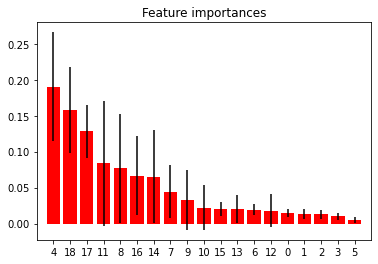

In [17]:
# Feature importance.
import matplotlib.pyplot as plt

importances = bestF.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in bestF.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printando o ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotando o gráfico de importância
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Conclusão

* 0 - Gender
* 1 - SeniorCitizen
* 2 - Partner
* 3 - Dependents
* 4 - Tenure
* 5 - PhoneService
* 6 - MultipleLines
* 7 - InternetService
* 8 - OnlineSecurity
* 9 - OnlineBackup
* 10 - DeviceProtection
* 11 - TechSupport
* 12 - StreamingTV
* 13 - StreamingMovies
* 14 - Contract
* 15 - PaperlessBilling
* 16 - PaymentMethod
* 17 - MonthlyCharges
* 18 - TotalCharges

### Conseguimos um modelo com aproximadamente 78% de acurácia e as 5 variáveis que mais tiveram importância na tomada de decisão foram 4 (Tenure - 19,02%), 18 (TotalCharges - 15,81%), 17 (MonthlyCharges - 12,80%), 11 (TechSupport - 8,37%) e 8 (OnlineSecurity - 7,67%).